In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans #to implement k-means algorithm
from sklearn.metrics import silhouette_score #to see how well the clustering has been done

In [8]:
#reading the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practice Projects/Datasets/wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#normalising the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

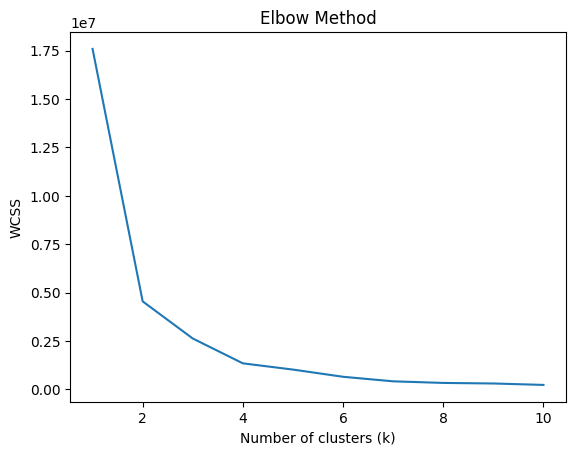

In [ ]:

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for KMeans

# Plot the WCSS to see the "elbow"
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

using elbow method number of clusters are 4

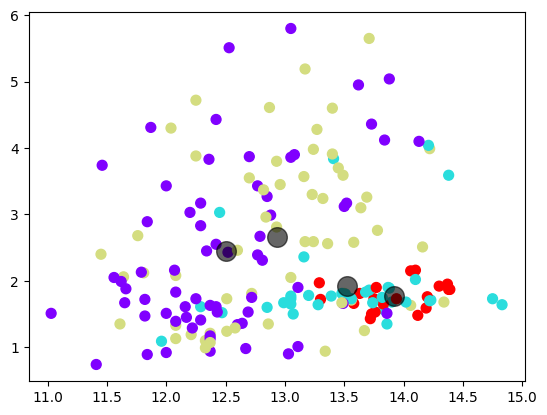

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizing the clusters
plt.scatter(data['Alcohol'].to_numpy(), data['Malic_Acid'].to_numpy(), c=labels, cmap='rainbow', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)
plt.show()